In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

In [ ]:
datosm = pd.read_table("https://raw.githubusercontent.com/DavidRogelioMC/XXX-Verano-de-investigacion/master/NGC1003_rotmod.dat",header=2)
datosm.columns=["Rad (kpc)", "Vobs (km/s)", "errV (km/s)","Vgas (km/s)","Vdisk (km/s)","Vbul (km/s)","SBdisk (L/pc^2)","SBbul (L/pc^2)"]

De Newton $v = \sqrt{\frac{GM}{r}}$, entonces 

$M = \frac{v^2r}{G}$

In [ ]:
M_sun = 1.98847e30 #Masa del sol en kg
kpc = 3.0857e19 # Valor de 1 kilopársec en m
G1 = (sc.G/kpc**3)*M_sun # Constante G en unidades de kpc^3/M_sun*s^2
G2 = (sc.G/(1e6*(kpc)))*M_sun # Constante G en unidades de kpc*km^2/M_o*s^2
print(G1)
print(G2)
#Masas
M_obs = datosm['Vobs (km/s)']**2*datosm['Rad (kpc)']/G2
M_gas = datosm['Vgas (km/s)']**2*datosm['Rad (kpc)']/G2
M_disk = datosm['Vdisk (km/s)']**2*datosm['Rad (kpc)']/G2

4.517141190141179e-39
4.3010160809540775e-06


In [ ]:
# Reemplzando columnas de velocidades por columnas de masas; en masas solares

datosm['Vobs (km/s)'] = M_obs
datosm['Vgas (km/s)'] = M_gas
datosm['Vdisk (km/s)'] = M_disk

#Renombramos
datosm.columns = ["Rad (kpc)", "Mobs (Mo)", "errV (km/s)","Mgas (Mo)","Mdisk (Mo)","Mbul (Mo)","SBdisk (L/pc^2)","SBbul (L/pc^2)"]

In [ ]:
#Elimino tres columnas

datosm = datosm.drop(columns=['errV (km/s)','SBdisk (L/pc^2)','SBbul (L/pc^2)'])

In [ ]:
# Agrego una columna de masa total

datosm.insert(5,'Mtotal (Mo)',datosm['Mgas (Mo)']+datosm['Mdisk (Mo)'])

In [ ]:
datosm

,Rad (kpc),Mobs (Mo),Mgas (Mo),Mdisk (Mo),Mbul (Mo),Mtotal (Mo)
0,1.25,6.419995e+08,1.221368e+06,9.435911e+08,0.0,9.448125e+08
1,2.08,1.712088e+09,1.781844e+07,2.020043e+09,0.0,2.037861e+09
2,2.90,3.456631e+09,7.879131e+07,3.783611e+09,0.0,3.862403e+09
3,3.73,5.222293e+09,1.884225e+08,5.237109e+09,0.0,5.425531e+09
4,4.56,7.374386e+09,3.064020e+08,6.712627e+09,0.0,7.019029e+09
5,5.39,1.008330e+10,4.648687e+08,7.898585e+09,0.0,8.363454e+09
6,6.22,1.272404e+10,6.759751e+08,7.787082e+09,0.0,8.463057e+09
7,7.04,1.604250e+10,9.108723e+08,7.910813e+09,0.0,8.821685e+09
8,7.87,1.941235e+10,1.336890e+09,7.958537e+09,0.0,9.295428e+09
9,8.70,2.022778e+10,1.643001e+09,7.977512e+09,0.0,9.620513e+09


In [ ]:
datosv = pd.read_table("https://raw.githubusercontent.com/DavidRogelioMC/XXX-Verano-de-investigacion/master/NGC1003_rotmod.dat",header=2)
datosv.columns=["Rad (kpc)", "Vobs (km/s)", "errV (km/s)","Vgas (km/s)","Vdisk (km/s)","Vbul (km/s)","SBdisk (L/pc^2)","SBbul (L/pc^2)"]
datosv = datosv.drop(columns=['errV (km/s)','SBdisk (L/pc^2)','SBbul (L/pc^2)'])

$$ v = \sqrt{\frac{G}{r}(M_{gas}+M_{disk})} $$

In [ ]:
r = datosm['Rad (kpc)']
vT = np.sqrt(G1*(datosm['Mtotal (Mo)'])/r)
datosv.insert(5,'V_total',vT)

In [ ]:
datosv

,Rad (kpc),Vobs (km/s),Vgas (km/s),Vdisk (km/s),Vbul (km/s),V_total
0,1.25,47.0,2.05,56.98,0.0,1.847777e-15
1,2.08,59.5,6.07,64.63,0.0,2.103718e-15
2,2.90,71.6,10.81,74.91,0.0,2.452797e-15
3,3.73,77.6,14.74,77.71,0.0,2.563295e-15
4,4.56,83.4,17.00,79.57,0.0,2.636865e-15
5,5.39,89.7,19.26,79.39,0.0,2.647465e-15
6,6.22,93.8,21.62,73.38,0.0,2.479136e-15
7,7.04,99.0,23.59,69.52,0.0,2.379147e-15
8,7.87,103.0,27.03,65.95,0.0,2.309825e-15
9,8.70,100.0,28.50,62.80,0.0,2.234968e-15


Velocidad de referencia

$$v(r)=\left(a_{0} l_{\mathrm{M}} \frac{1-x^{4}}{1-x^{3}}\right)^{1 / 2}$$

con,

$$ x = \frac{l_M}{r} $$ \\


\begin{align}
l_M = \left( \frac{GM_T}{a_0} \right)^{1/2} & ; & M_T = M_{gas} + M_{disk}
\end{align}\\



$$ a_0 = 1.2 \times 10^{-10} m s^{-2} $$

In [ ]:
from scipy.optimize import curve_fit

[87.11007831]


Text(0.5, 1.0, 'Ajuste')

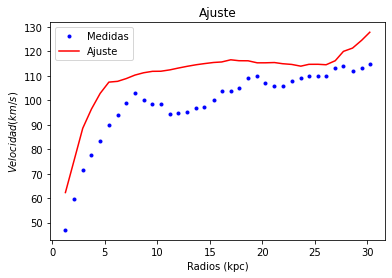

In [ ]:
v = datosv['Vobs (km/s)']
n=3
def velocidad_a0(r,n):
  a00 = 1.2e-10 #en m/s^2
  a0 = a00*(1/(kpc)) #en kpc/s^2
  lm = np.sqrt(G1*datosm['Mtotal (Mo)']/a0)
  x = lm/r
  return np.sqrt(a00*lm*3.0857e13*(1-x**(n+1))/(1-x**n))

popt, pcov = curve_fit(velocidad_a0, r,v)
print(popt)

teorico = velocidad_a0(r,*popt)

plt.plot(r,v,'b.',r,teorico,'r-')

plt.legend(('Medidas', 'Ajuste'))
plt.xlabel("Radios (kpc)")
plt.ylabel("$Velocidad (km/s)$")
plt.title("Ajuste")

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


[7.32873774e-11]


Text(0.5, 1.0, 'Ajuste')

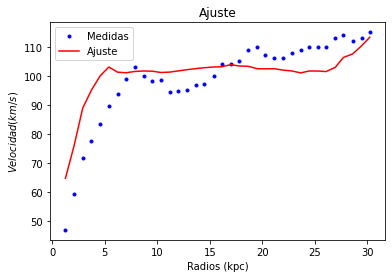

In [ ]:
del v

v = datosv['Vobs (km/s)']

def velocidad_a0(r,a0):
  lm = np.sqrt(G1*datosm['Mtotal (Mo)']/(a0*(1/(kpc))))
  x = lm/r
  return np.sqrt(a0*lm*3.0857e13*(1-x**(4))/(1-x**3))

popt, pcov = curve_fit(velocidad_a0, r,v)
print(popt)

teorico = velocidad_a0(r,*popt)

plt.plot(r,v,'b.',r,teorico,'r-')

plt.legend(('Medidas', 'Ajuste'))
plt.xlabel("Radios (kpc)")
plt.ylabel("$Velocidad (km/s)$")
plt.title("Ajuste")

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[7.81958249e-11 2.39550921e+03]


Text(0.5, 1.0, 'Ajuste')

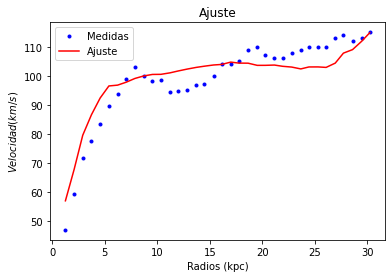

In [ ]:
del v

v = datosv['Vobs (km/s)']

def velocidad_a0n(r,a0,n):
  lm = np.sqrt(G1*datosm['Mtotal (Mo)']/(a0*(1/(kpc))))
  x = lm/r
  return np.sqrt(a0*lm*3.0857e13*(1-x**(n+1))/(1-x**n))

popt, pcov = curve_fit(velocidad_a0n, r,v)
print(popt)

teorico2 = velocidad_a0n(r,*popt)

plt.plot(r,v,'b.',r,teorico2,'r-')

plt.legend(('Medidas', 'Ajuste'))
plt.xlabel("Radios (kpc)")
plt.ylabel("$Velocidad (km/s)$")
plt.title("Ajuste")